In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import r2_score
from matplotlib_venn import venn2
import matplotlib
matplotlib.rcParams['figure.dpi'] = 500

In [2]:
training_results = pd.read_csv("../data/IDX/conversion_results_6460.csv")
training_results

,Unnamed: 0,Name,mz,rt_start,rt_end,Product mz,Charge,CE,Training,HRMS_CE,Converted_CE
0,0,cAMP,330.059796,1.78,3.57,136.1,1,24,1,40.0,24.265654
1,1,cAMP,330.059796,1.78,3.57,97.1,1,20,1,30.0,20.069464
2,2,cAMP,330.059796,1.78,3.57,312.0,1,16,1,25.0,17.971370
3,3,cAMP,330.059796,1.78,3.57,119.1,1,40,1,80.0,41.050412
4,4,Acetyl-CoA,810.133046,6.02,6.43,303.1,1,32,1,30.0,26.530719
5,5,Acetyl-CoA,810.133046,6.02,6.43,428.0,1,28,1,20.0,22.334530
6,6,Acetyl-CoA,810.133046,6.02,6.43,201.0,1,32,1,20.0,22.334530
7,7,Acetyl-CoA,810.133046,6.02,6.43,435.4,1,12,1,60.0,39.119288
8,8,Adenine,136.061776,2.18,3.22,119.1,1,24,1,40.0,21.654655
9,9,Adenine,136.061776,2.18,3.22,92.1,1,32,1,60.0,30.047034


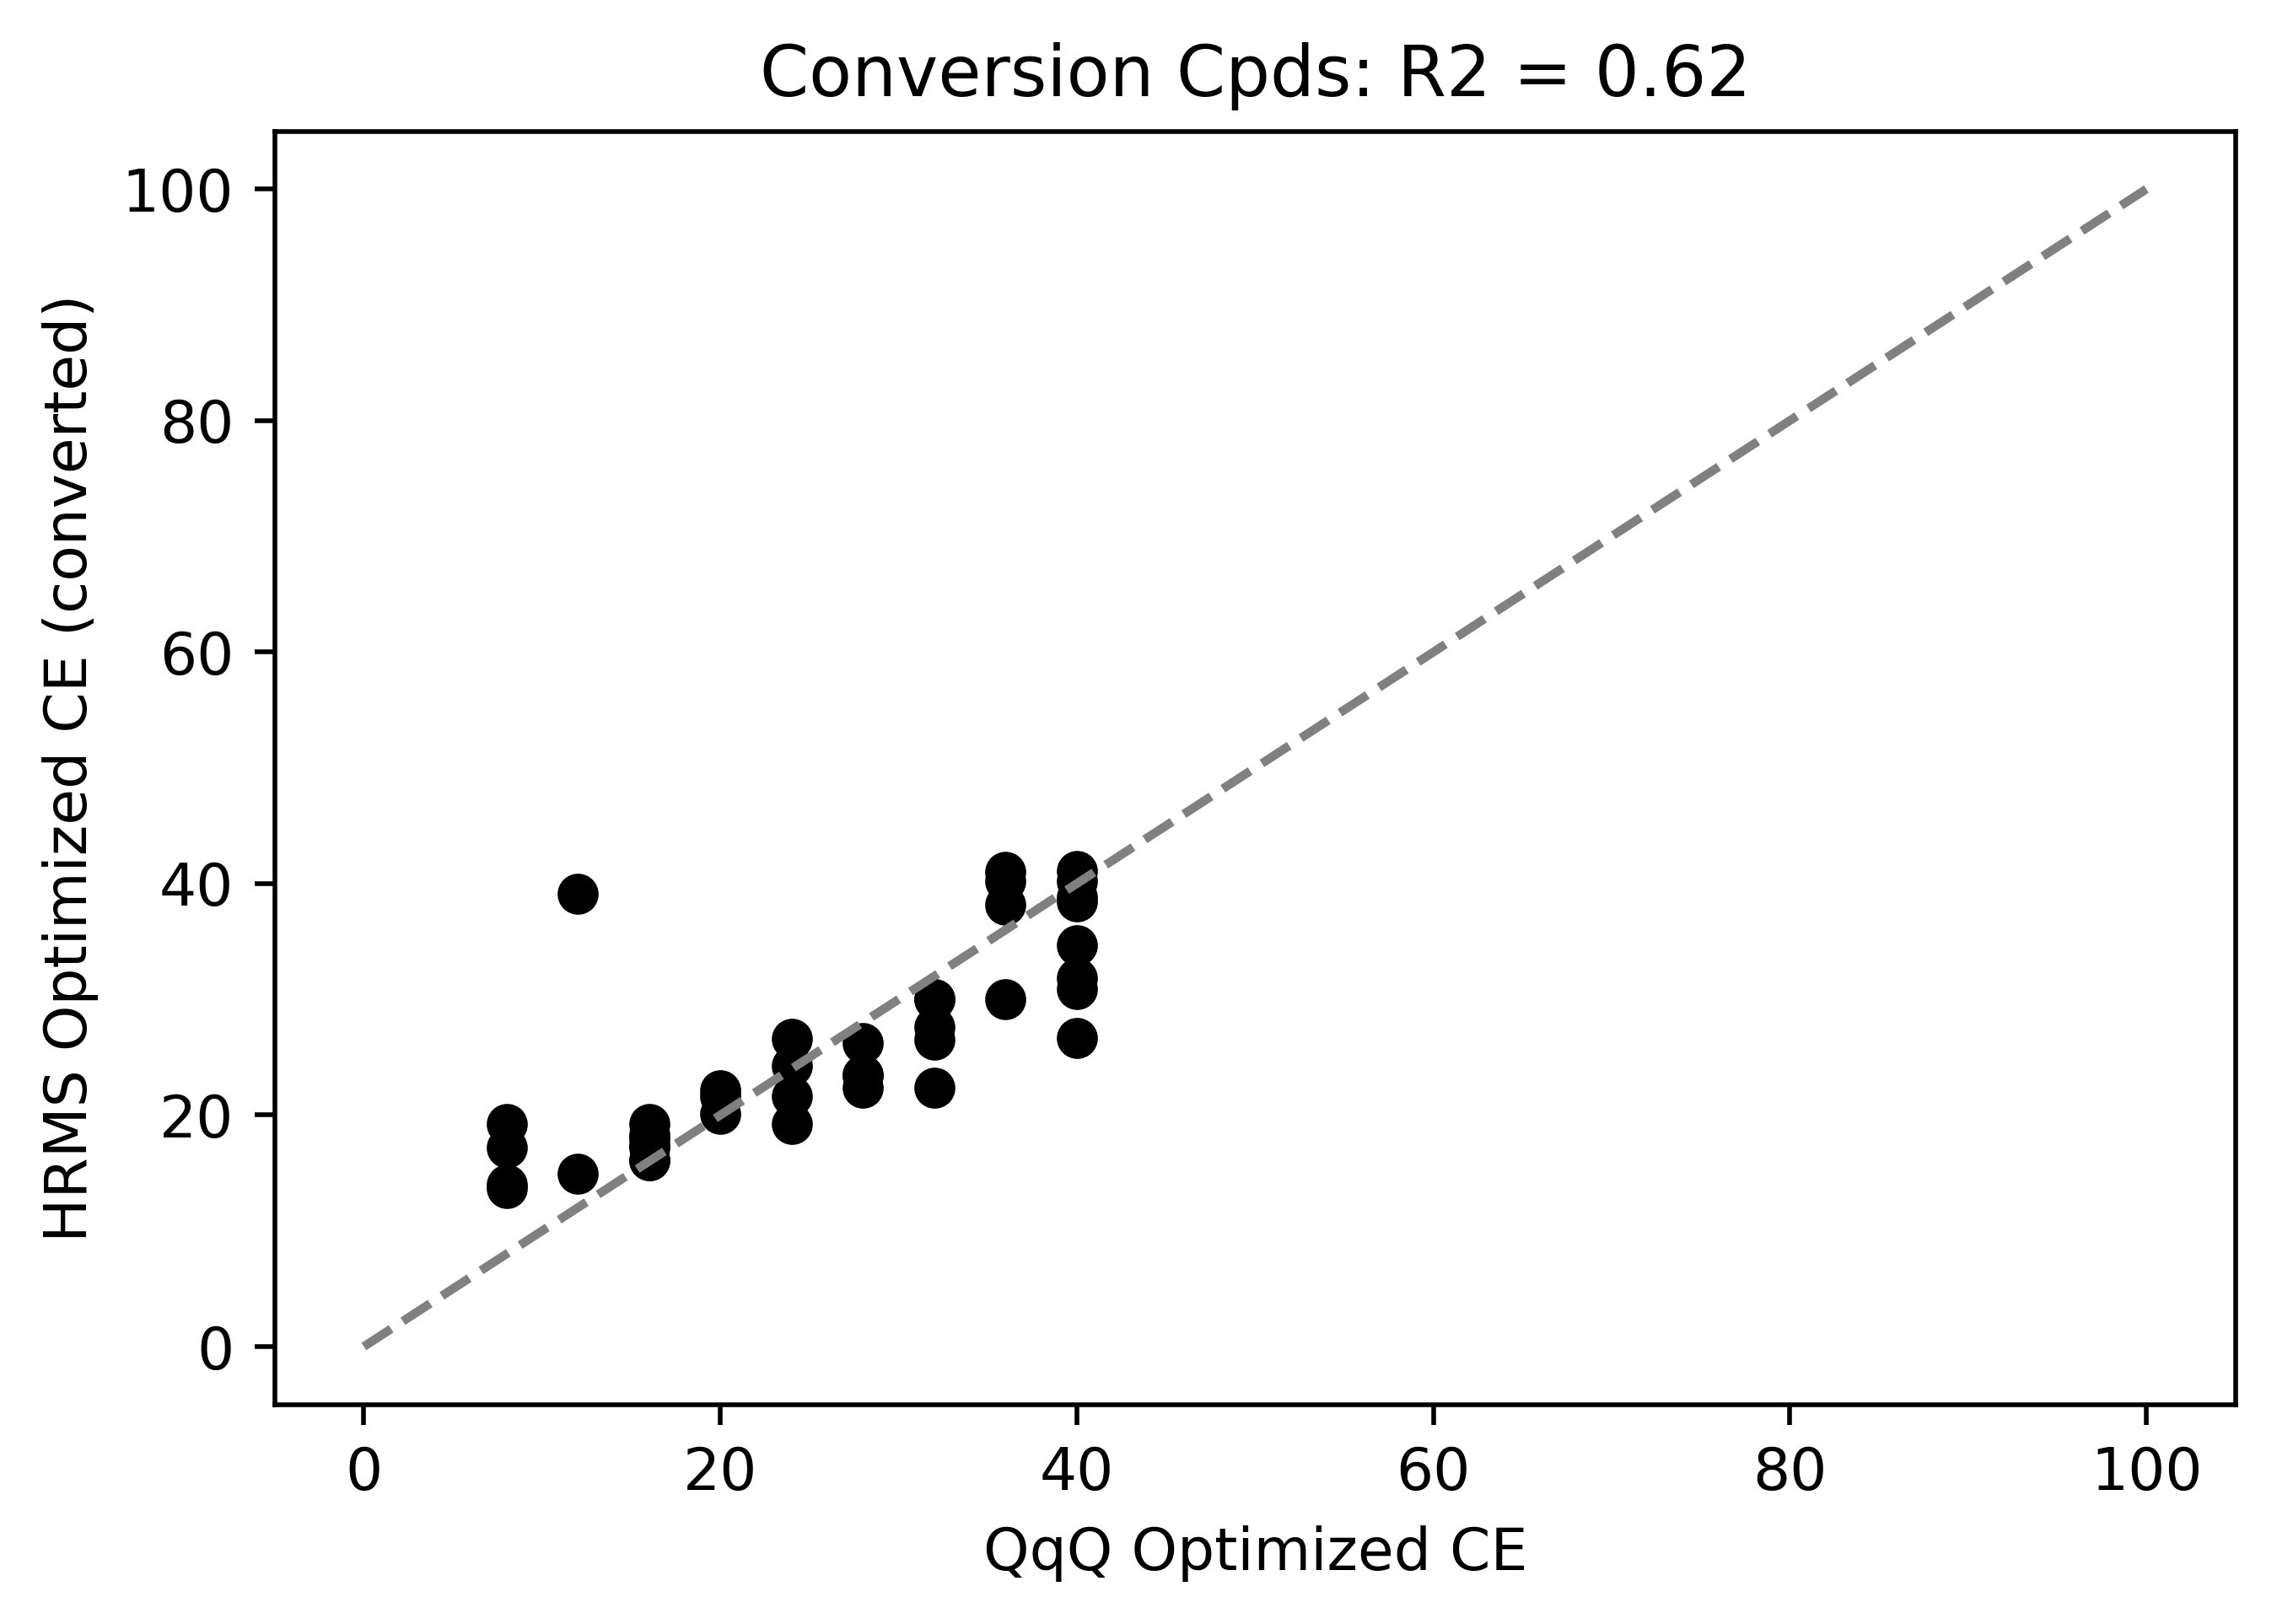

In [3]:
plt.scatter(training_results["CE"],training_results["Converted_CE"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(training_results["CE"],training_results["Converted_CE"])
plt.title("Conversion Cpds: R2 = "+str(np.round(r2,2)))
plt.savefig("training_scatter_6460.png")

In [4]:
totalTransitionInfoFn = "../data/IDX/6460_m3t_transitions.csv"
totalTransitions = pd.read_csv(totalTransitionInfoFn)
totalTransitions = totalTransitions[totalTransitions["Product mz"] > 50]
totalTransitions

,Name,mz,rt_start,rt_end,Product mz,Charge,CE,Training
0,cAMP,330.059796,1.78,3.57,136.1,1,24,1
1,cAMP,330.059796,1.78,3.57,97.1,1,20,1
2,cAMP,330.059796,1.78,3.57,312.0,1,16,1
3,cAMP,330.059796,1.78,3.57,119.1,1,40,1
4,cGMP,346.054706,5.17,5.58,152.0,1,20,0
...,...,...,...,...,...,...,...,...
290,Lysine,147.112806,11.13,12.00,67.2,1,28,0
291,Cysteine,122.027026,6.99,7.43,59.2,1,24,0
292,Cysteine,122.027026,6.99,7.43,76.2,1,12,0
293,Cysteine,122.027026,6.99,7.43,87.1,1,8,0


In [5]:
resultData = pd.read_csv("../data/IDX/generated_SRM_table_6460.csv")
resultData

,Unnamed: 0,Name,rt_start,rt_end,mz,Charge,Product mz,CE,Normalized Intensity
0,0,cAMP,1.78,3.57,330.059796,1,136.06,24.265654,5.567093e+06
1,1,cAMP,1.78,3.57,330.059796,1,119.03,41.050412,5.817144e+05
2,2,cAMP,1.78,3.57,330.059796,1,137.05,41.050412,4.077533e+05
3,3,cAMP,1.78,3.57,330.059796,1,119.04,41.050412,3.053192e+05
4,4,cAMP,1.78,3.57,330.059796,1,94.04,41.050412,2.525093e+05
...,...,...,...,...,...,...,...,...,...
505,505,Uracil,1.84,2.53,113.034556,1,70.03,19.246640,3.634142e+03
506,506,Uracil,1.84,2.53,113.034556,1,95.06,12.952355,2.745215e+03
507,507,Uracil,1.84,2.53,113.034556,1,96.01,15.050450,2.363619e+03
508,508,Uracil,1.84,2.53,113.034556,1,84.08,25.540924,1.726087e+03


In [6]:
resultData_unconv = pd.read_csv("../data/IDX/generated_SRM_table_unconverted_6460.csv")
resultData_unconv = resultData_unconv[["CE"]]
resultData_unconv.columns = ["unconverted CE"]
resultData = pd.concat((resultData,resultData_unconv),axis=1,ignore_index=False)
resultData

,Unnamed: 0,Name,rt_start,rt_end,mz,Charge,Product mz,CE,Normalized Intensity,unconverted CE
0,0,cAMP,1.78,3.57,330.059796,1,136.06,24.265654,5.567093e+06,40.0
1,1,cAMP,1.78,3.57,330.059796,1,119.03,41.050412,5.817144e+05,80.0
2,2,cAMP,1.78,3.57,330.059796,1,137.05,41.050412,4.077533e+05,80.0
3,3,cAMP,1.78,3.57,330.059796,1,119.04,41.050412,3.053192e+05,80.0
4,4,cAMP,1.78,3.57,330.059796,1,94.04,41.050412,2.525093e+05,80.0
...,...,...,...,...,...,...,...,...,...,...
505,505,Uracil,1.84,2.53,113.034556,1,70.03,19.246640,3.634142e+03,35.0
506,506,Uracil,1.84,2.53,113.034556,1,95.06,12.952355,2.745215e+03,20.0
507,507,Uracil,1.84,2.53,113.034556,1,96.01,15.050450,2.363619e+03,25.0
508,508,Uracil,1.84,2.53,113.034556,1,84.08,25.540924,1.726087e+03,50.0


In [7]:
evalData = totalTransitions#[totalTransitions["Training"] < .5]
fragTol = .5

transition_indices = {}
for index,row in evalData.iterrows():
    new = True
    for index2,x in transition_indices.items():
        if x["Name"] == row["Name"] and np.abs(row["Product mz"] - x["Product mz"]) < fragTol and row["Charge"] == x["Charge"]:
            new = False
            transition_indices[index2]["QqQ Optimized CE"] = row["CE"]
            break
    if new:
        transition_indices[len(transition_indices)] = {"Name":row["Name"],"Product mz":row["Product mz"],"Charge":row["Charge"],"QqQ Optimized CE":row["CE"]}
        
for index,row in resultData.iterrows():
    if any((row["Name"],row["Charge"]) == (row2["Name"],row2["Charge"]) for _,row2 in evalData.iterrows()):
        new = True
        for index2,x in transition_indices.items():
            if x["Name"] == row["Name"] and np.abs(row["Product mz"] - x["Product mz"]) < fragTol and row["Charge"] == x["Charge"]:
                new = False
                transition_indices[index2]["HRMS Optimized CE (converted)"] = row["CE"]
                transition_indices[index2]["HRMS Optimized CE (unconverted)"] = row["unconverted CE"]
                break
        if new:
            transition_indices[len(transition_indices)] = {"Name":row["Name"],"Product mz":row["Product mz"],"Charge":row["Charge"],"HRMS Optimized CE (converted)":row["CE"],"HRMS Optimized CE (unconverted)":row["unconverted CE"]}
evaluation_results = pd.DataFrame.from_dict(transition_indices,orient="index")
evaluation_results

,Name,Product mz,Charge,QqQ Optimized CE,HRMS Optimized CE (converted),HRMS Optimized CE (unconverted)
0,cAMP,136.10,1,24.0,24.265654,40.0
1,cAMP,97.10,1,20.0,NaN,NaN
2,cAMP,312.00,1,16.0,NaN,NaN
3,cAMP,119.10,1,40.0,41.050412,80.0
4,cGMP,152.00,1,20.0,18.186643,25.0
...,...,...,...,...,...,...
496,Glycine,61.42,1,NaN,20.846819,40.0
497,Serotonine,78.99,1,NaN,26.403204,50.0
498,Uracil,95.06,1,NaN,12.952355,20.0
499,Uracil,84.08,1,NaN,25.540924,50.0


215


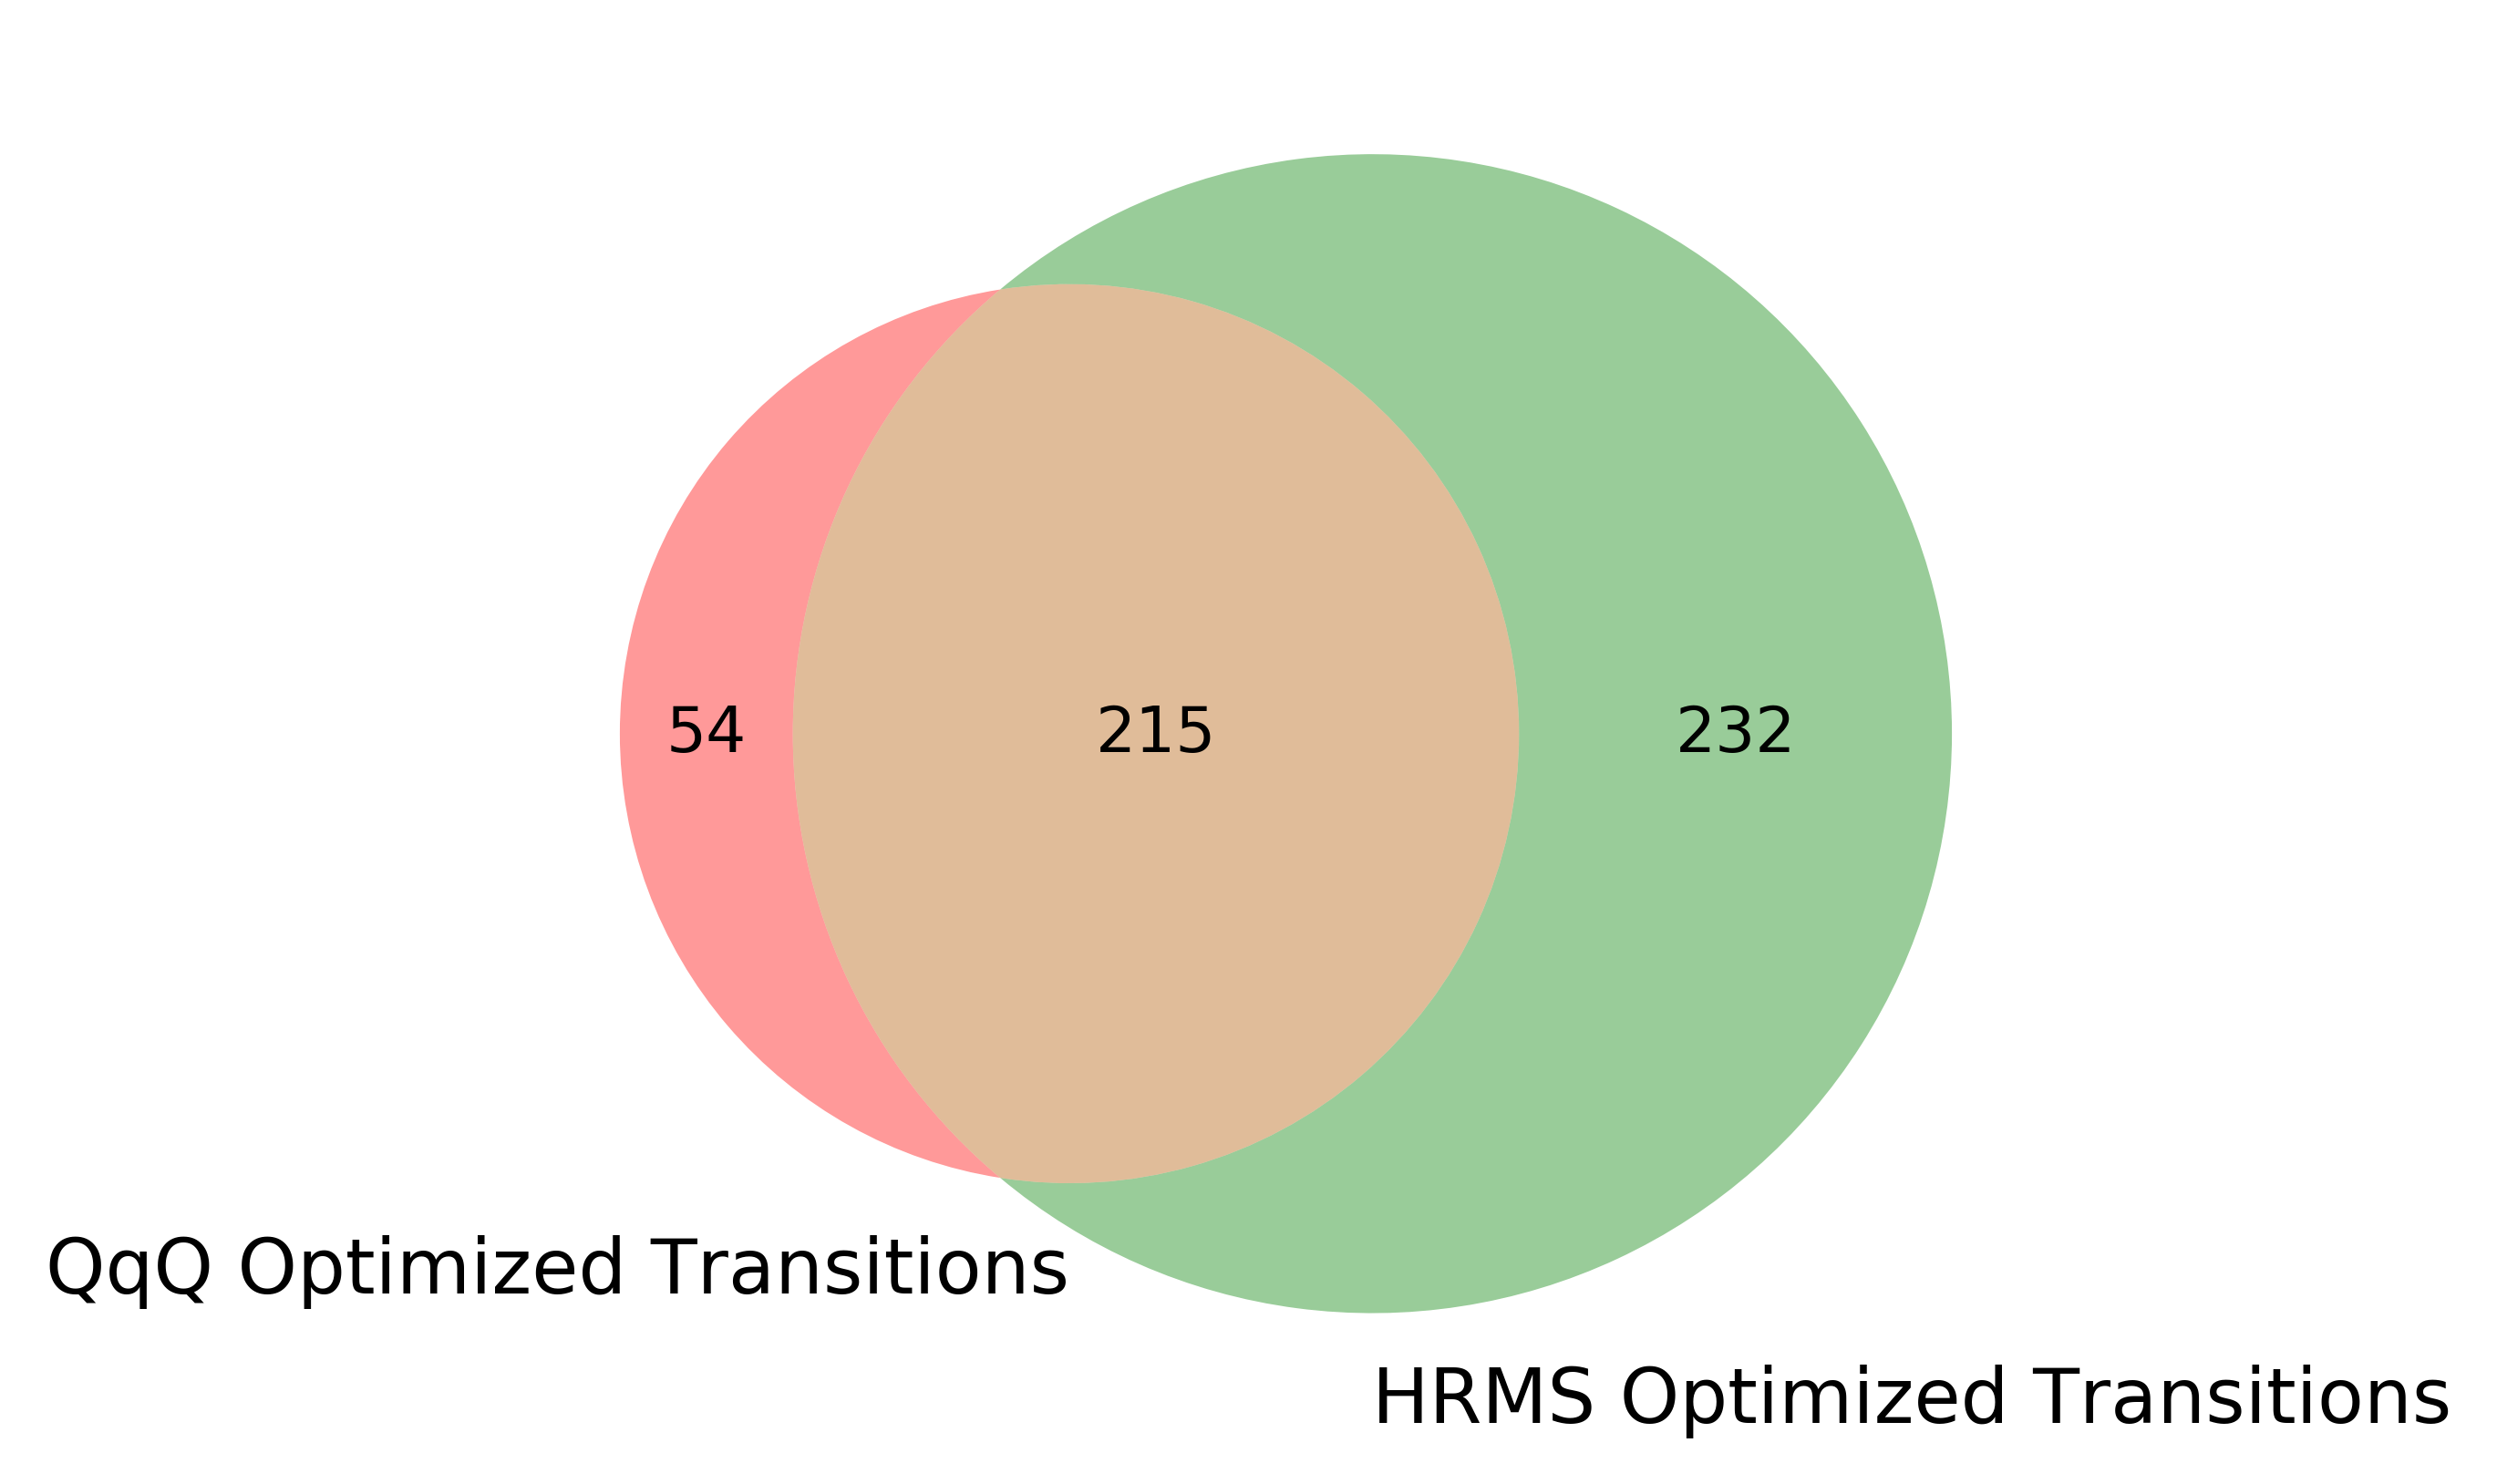

In [8]:
sharedInds = []
QqQ_trans = []
HRMS_trans = []

for index,row in evaluation_results.iterrows():
    if not (pd.isna(row["QqQ Optimized CE"]) or pd.isna(row["HRMS Optimized CE (converted)"])):
        sharedInds.append(index)
    if not pd.isna(row["QqQ Optimized CE"]):
        QqQ_trans.append(index)
    if not pd.isna(row["HRMS Optimized CE (converted)"]):
        HRMS_trans.append(index)
print(len(sharedInds))
filt = evaluation_results.loc[sharedInds,:]
filt.to_csv("combined_results_IDX_6460.csv")

venn2([set(QqQ_trans),set(HRMS_trans)],set_labels=["QqQ Optimized Transitions","HRMS Optimized Transitions"])
plt.savefig("venn_6460.png")

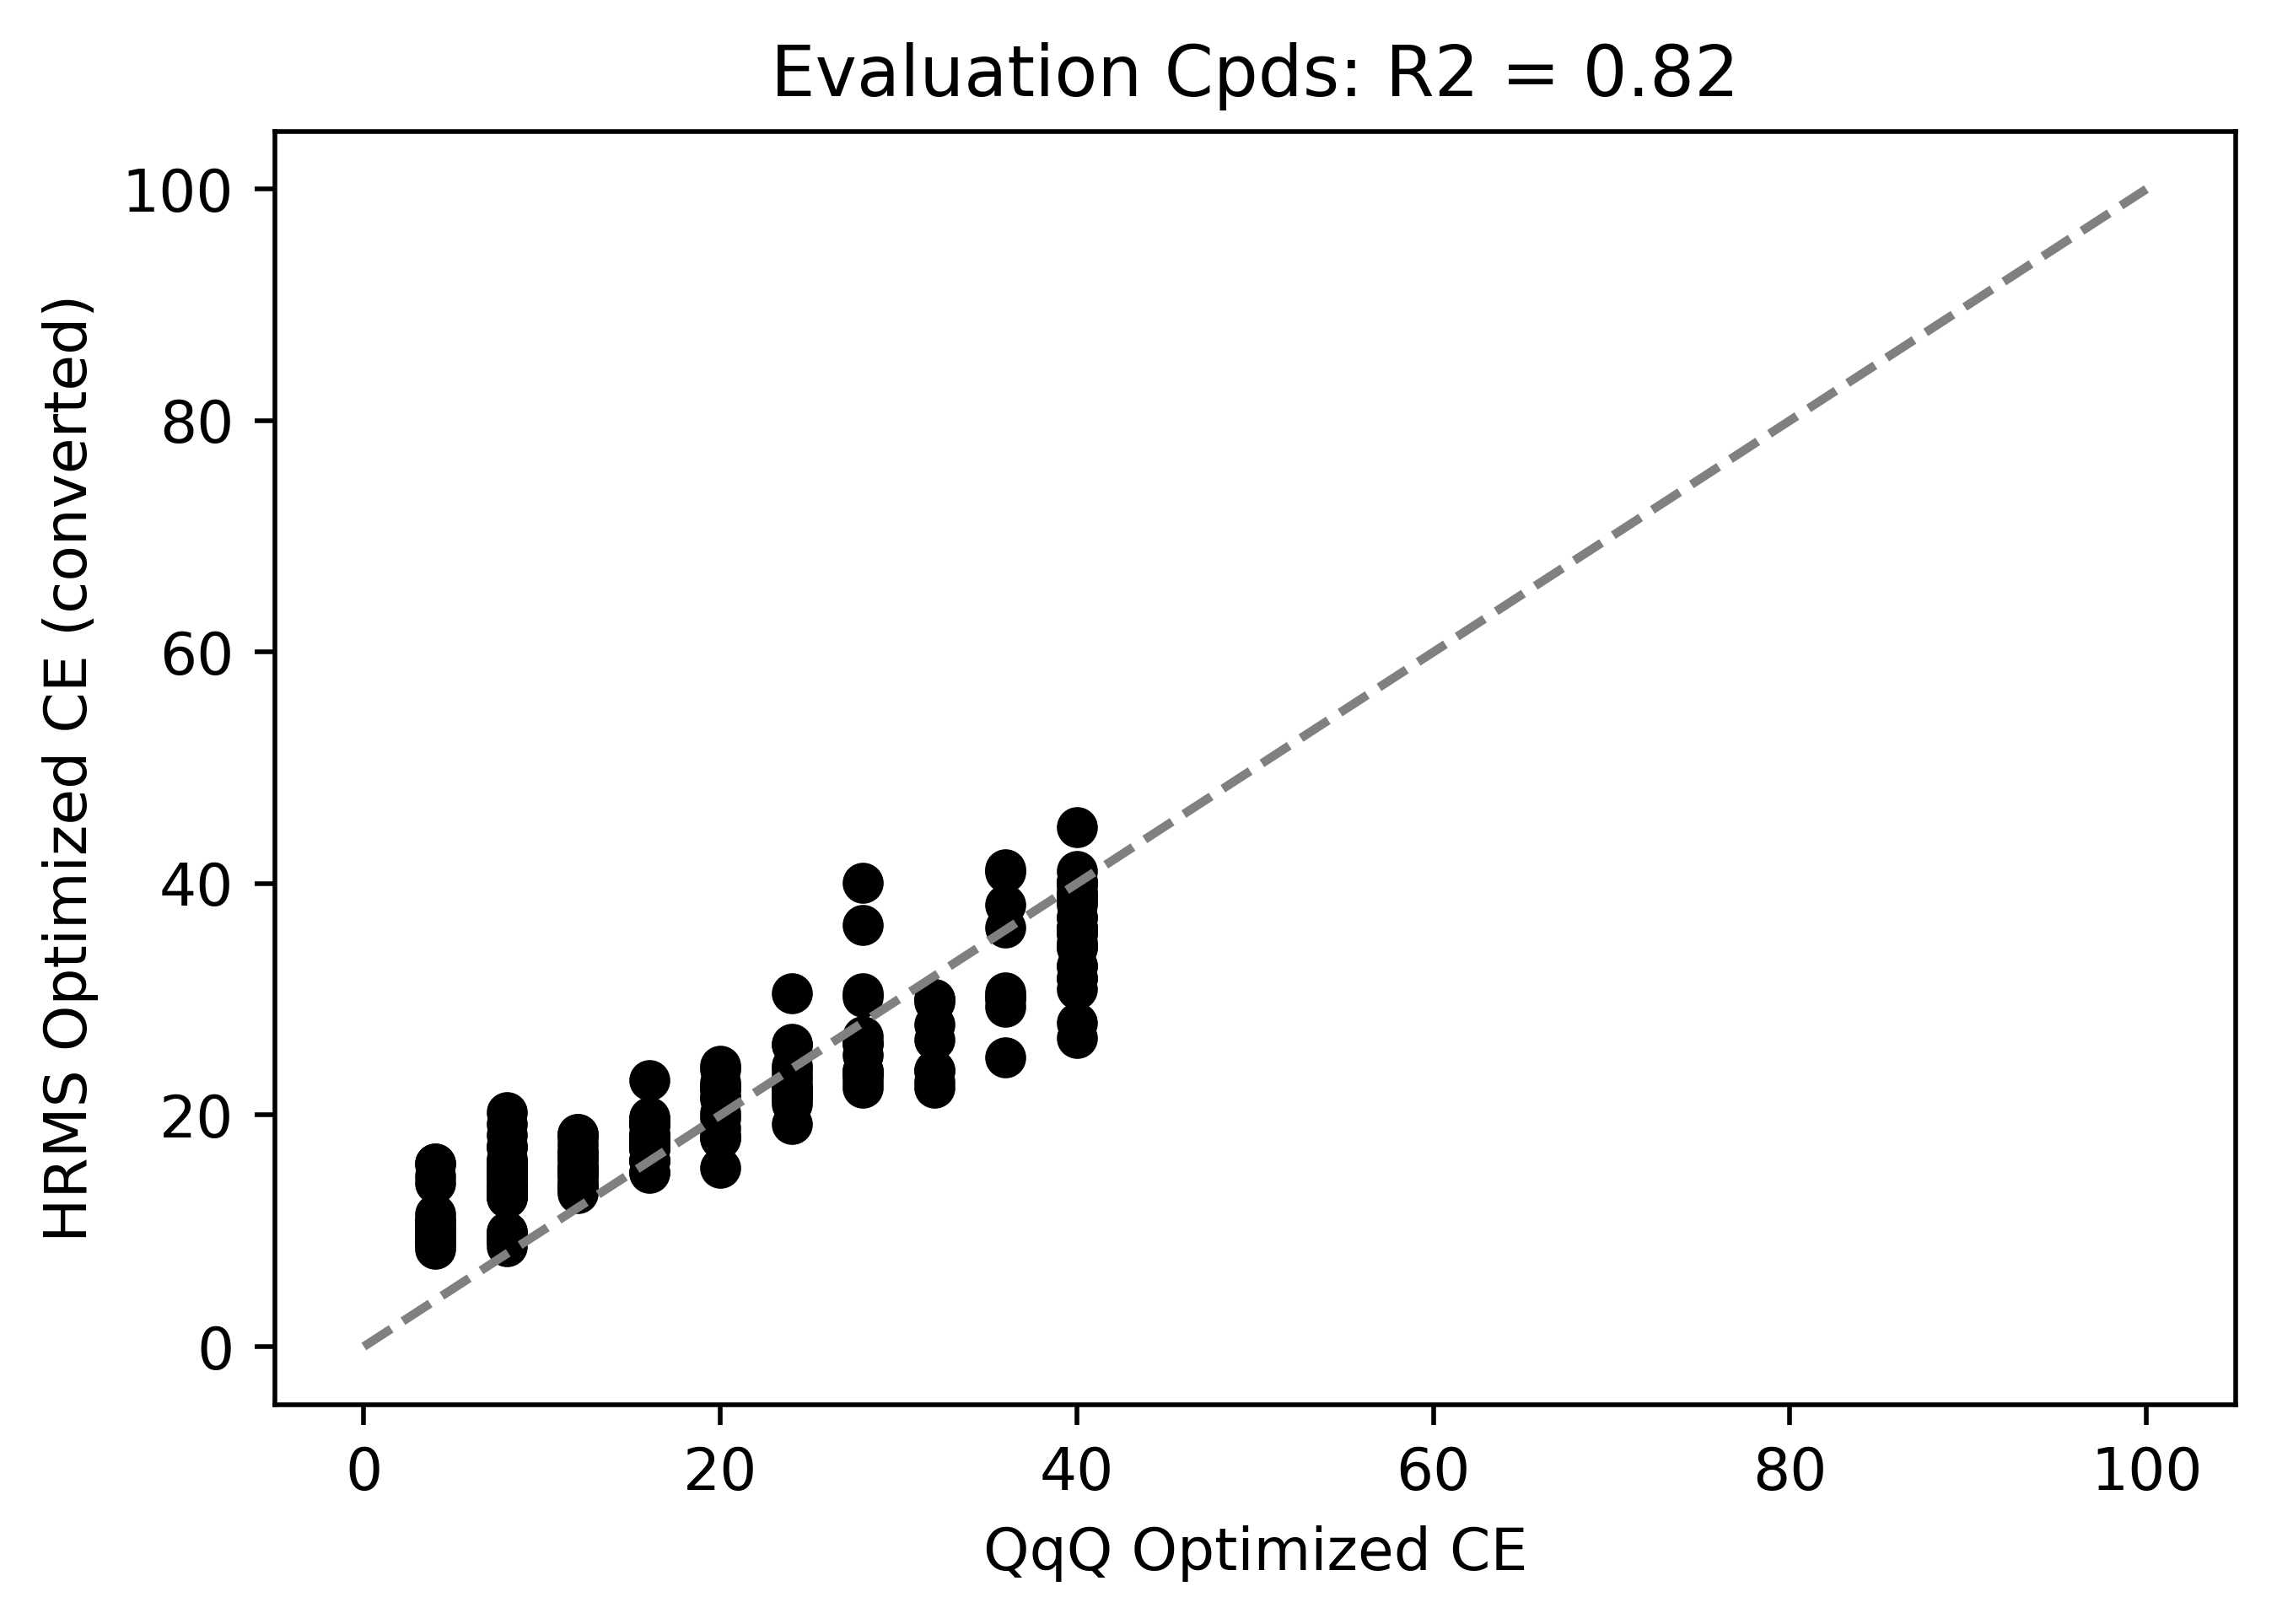

In [9]:
plt.scatter(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (converted)"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (converted)"])
plt.title("Evaluation Cpds: R2 = "+str(np.round(r2,2)))
plt.savefig("evaluation_scatter_6460.png")

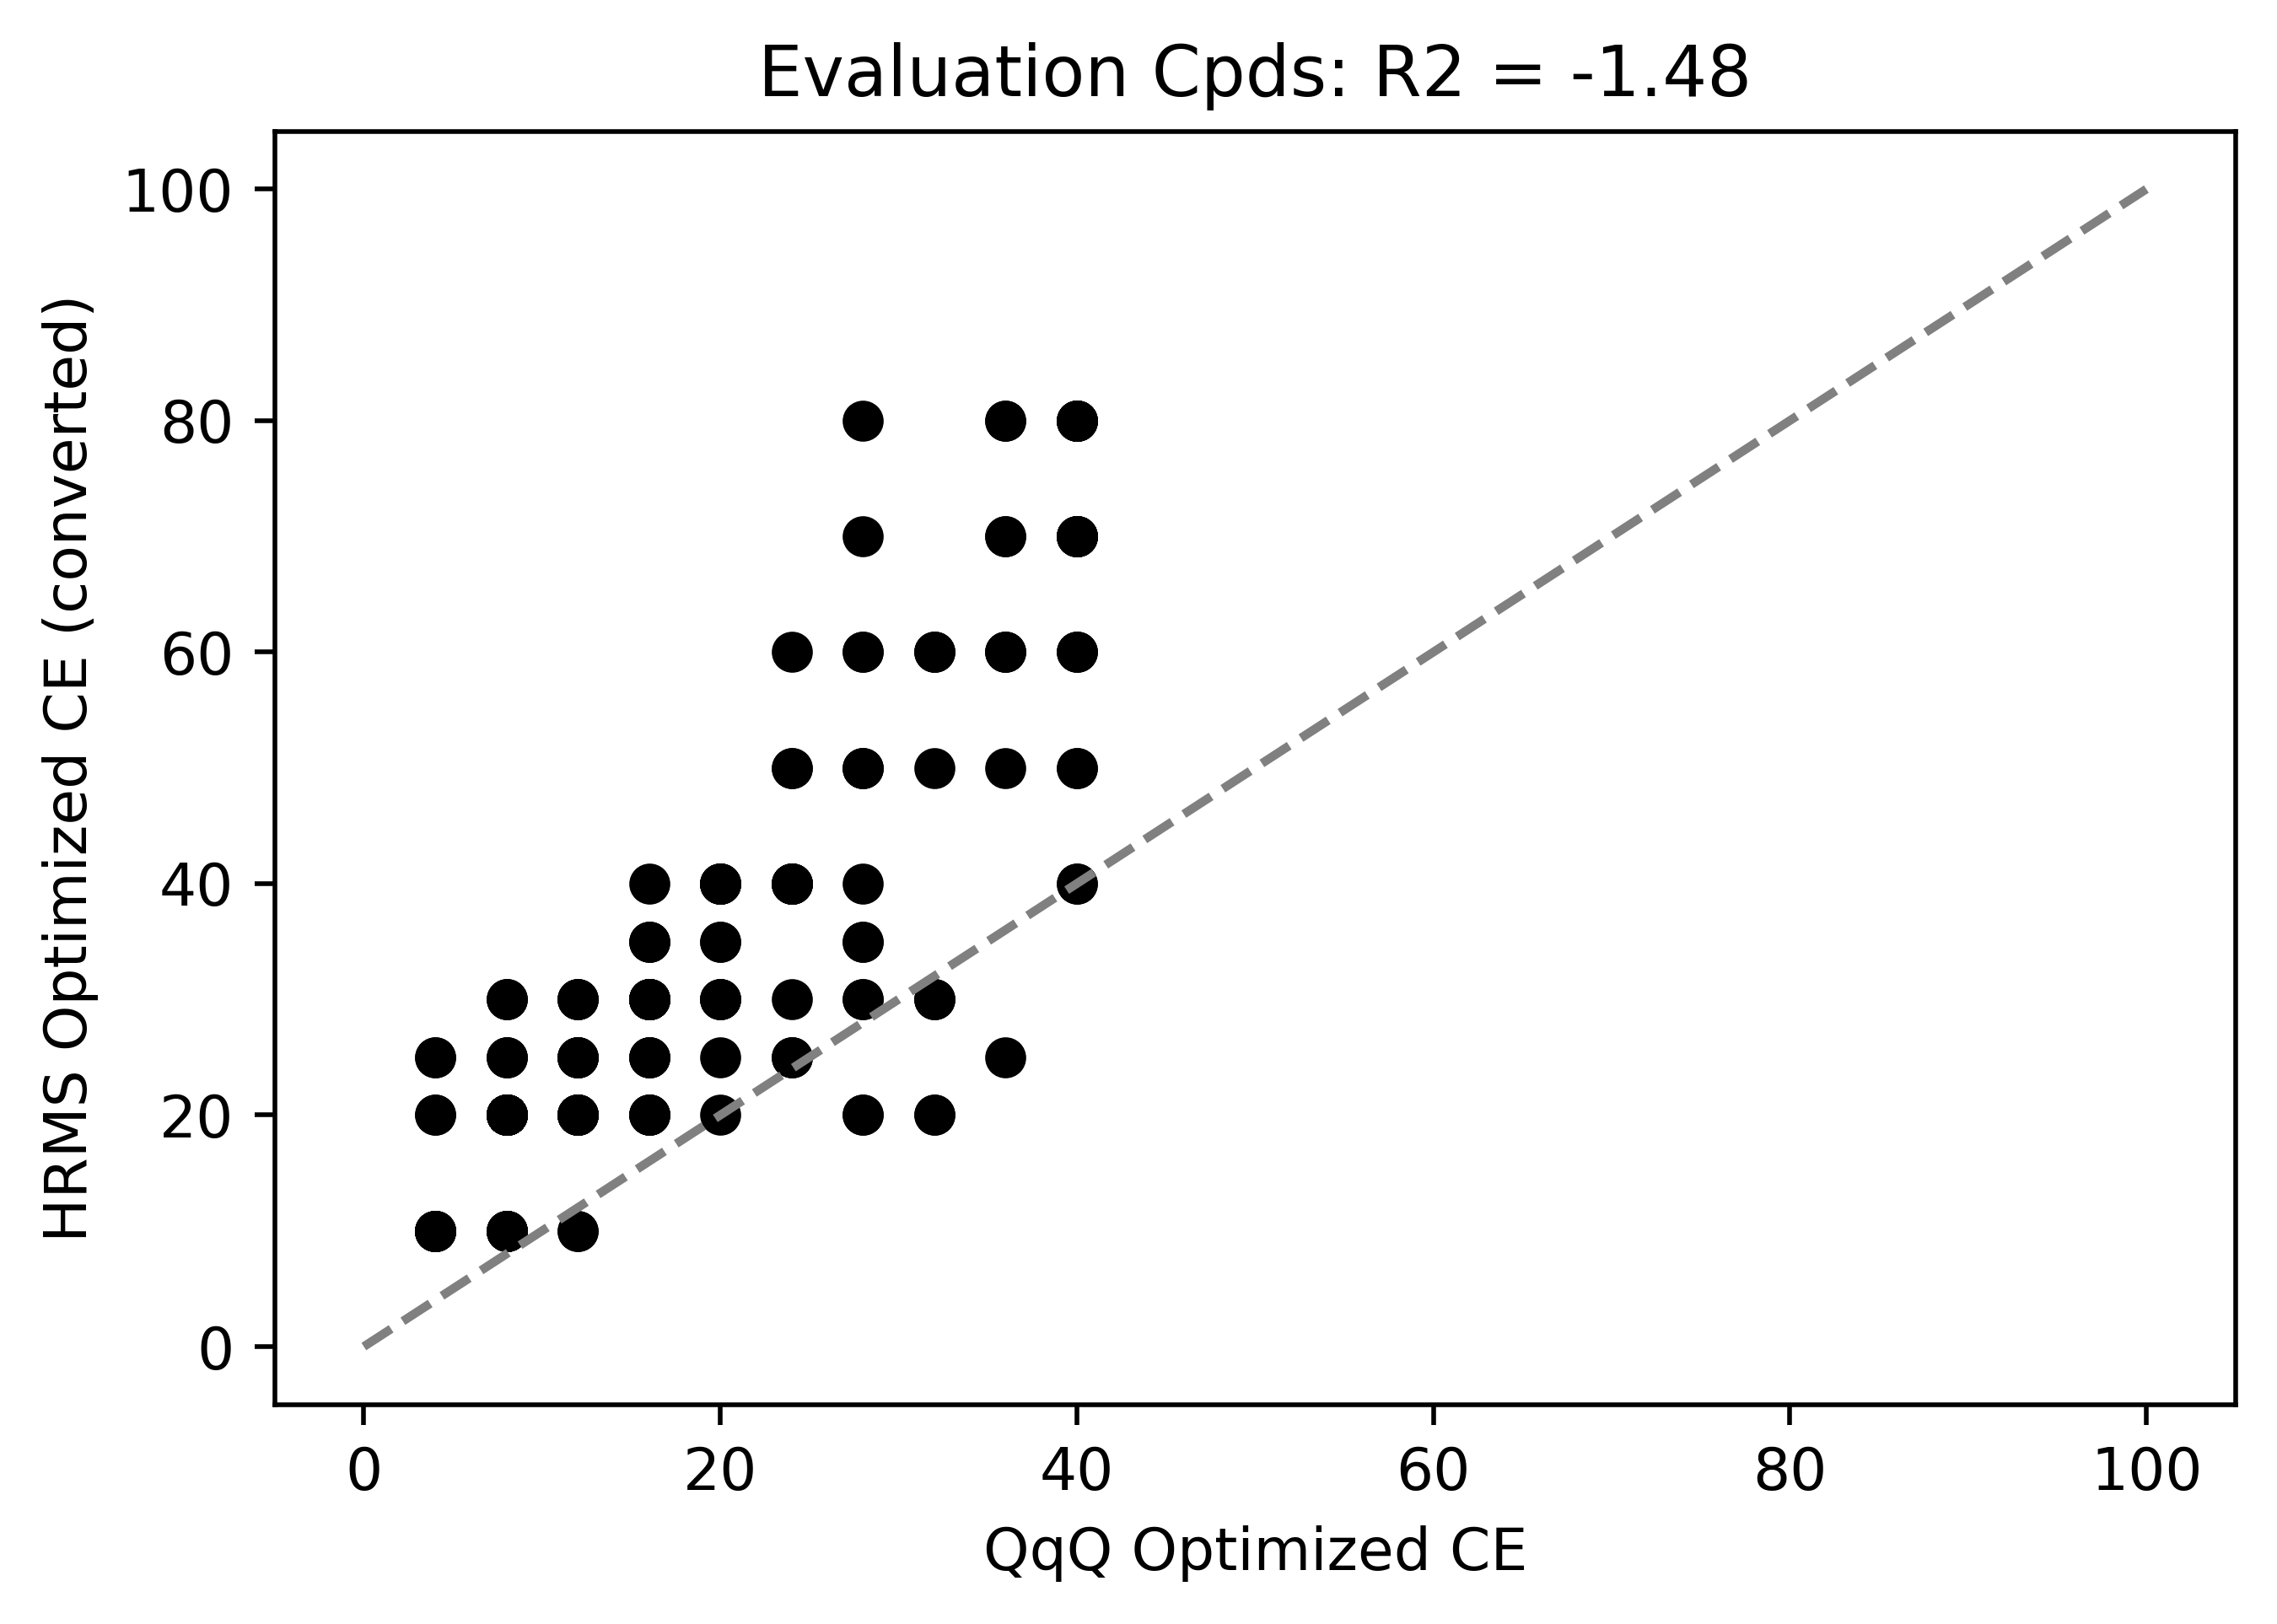

In [10]:
plt.scatter(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (unconverted)"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (unconverted)"])
plt.title("Evaluation Cpds: R2 = "+str(np.round(r2,2)))
plt.savefig("evaluation_scatter_unconverted_6460.png")

In [11]:
poorPerformers = []
for index,row in filt.iterrows():
    if np.abs(row["QqQ Optimized CE"] - row["HRMS Optimized CE (converted)"]) > 10:
        poorPerformers.append(index)
filt.loc[poorPerformers,:]

,Name,Product mz,Charge,QqQ Optimized CE,HRMS Optimized CE (converted),HRMS Optimized CE (unconverted)
8,Acetoacetyl-CoA,345.1,1,36.0,24.998040,25.0
109,UDP-N-acetyl-GN,138.1,1,40.0,28.007617,40.0
124,Adenosine,134.1,-1,8.0,19.208495,30.0
133,ATP,158.9,-1,40.0,26.633459,40.0
135,Cellobiose,101.1,-1,8.0,20.218174,30.0
152,Cytidine,109.5,-1,4.0,14.689141,20.0
153,DHAP,97.0,-1,4.0,15.803558,25.0
159,G1P,79.1,-1,28.0,40.094328,80.0
166,G3P,97.0,-1,4.0,15.803558,25.0
204,Selenomethionine,95.0,-1,8.0,18.265009,30.0
